In [1]:
import py_xydual
import numpy
from matplotlib import pyplot
import os
from tqdm.notebook import tqdm
import matplotlib
from matplotlib.patches import Polygon


pyplot.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [2]:
l = 8
pots = 0.4 * numpy.arange(0,10)**2

In [3]:
lats = py_xydual.PyRGLattice(l, pots, 3*8)

In [4]:
def plot_states(s):
    xs = numpy.arange(0,l)
    ys = numpy.arange(0,l)
    XS, YS = numpy.meshgrid(xs, ys)
    
    for ss in s:
        for x, y, sss in zip(XS.flatten(), YS.flatten(), ss.reshape((-1, 2))):
            if sss[0] != 0:
                pyplot.plot([x, x+1], [y, y], c='b' if sss[0] > 0 else 'r')
            
            if sss[1] != 0:
                pyplot.plot([x, x], [y, y+1], c='b' if sss[1] > 0 else 'r')
        
        pyplot.xlim(0-0.1,l+0.1)
        pyplot.ylim(0-0.1,l+0.1)
        pyplot.show()

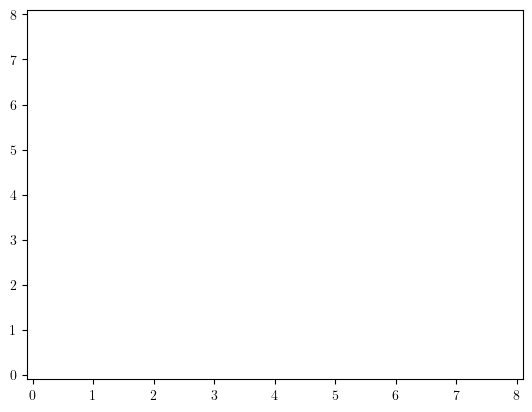

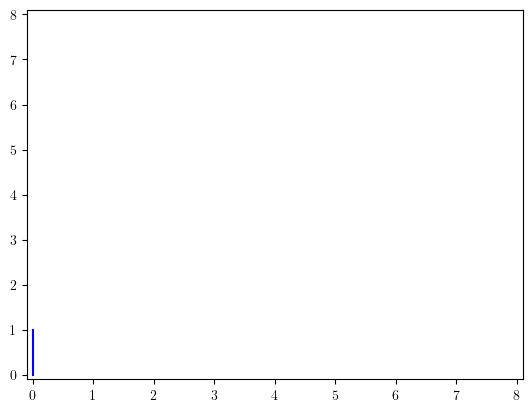

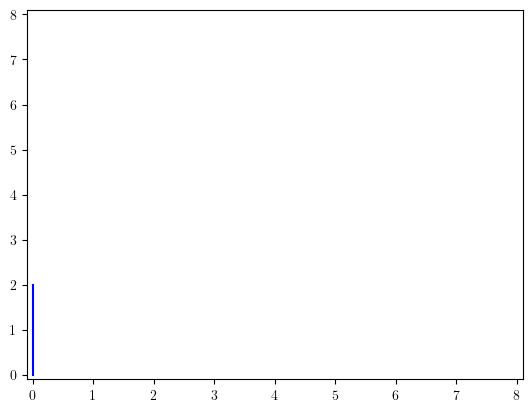

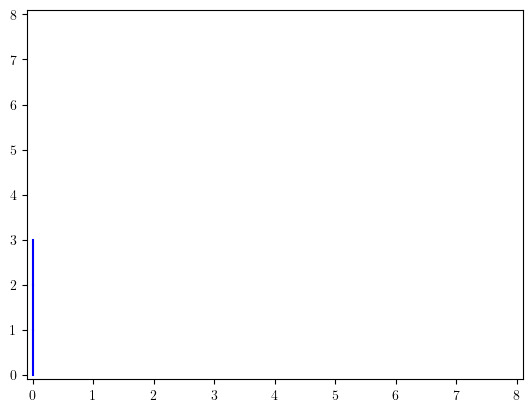

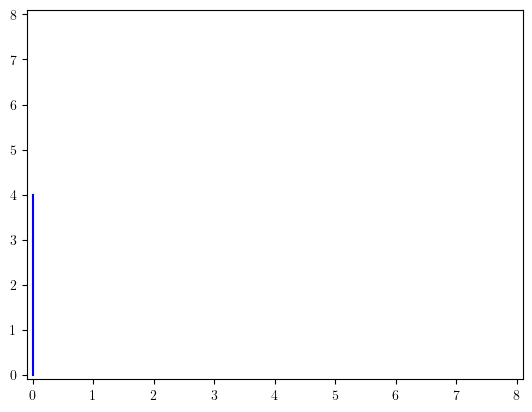

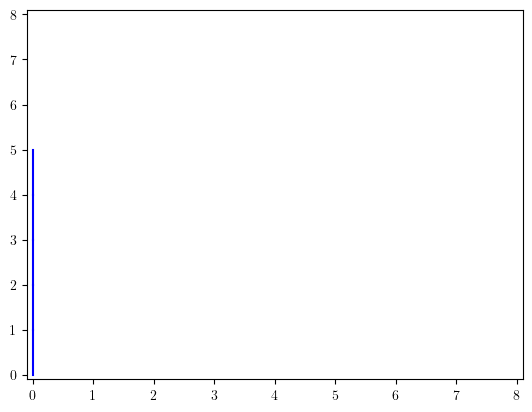

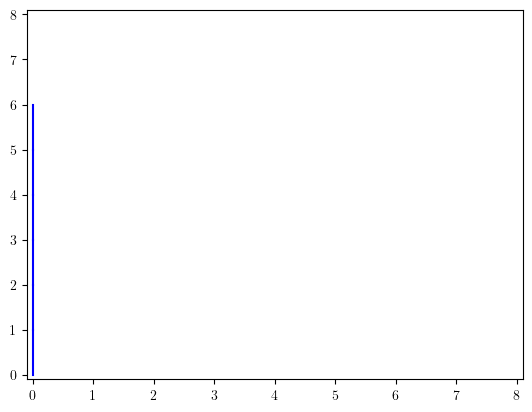

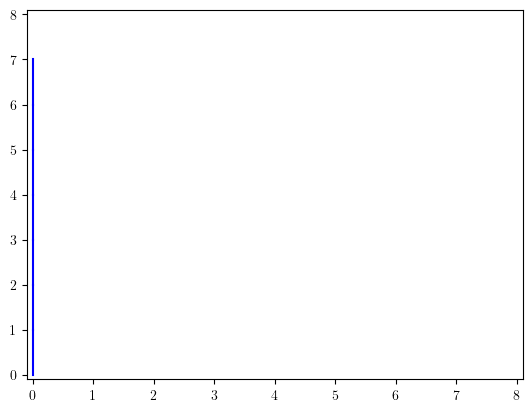

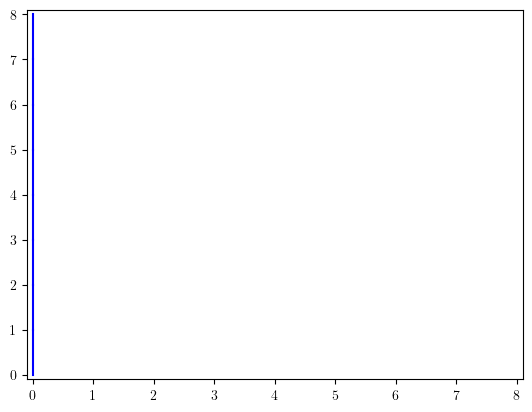

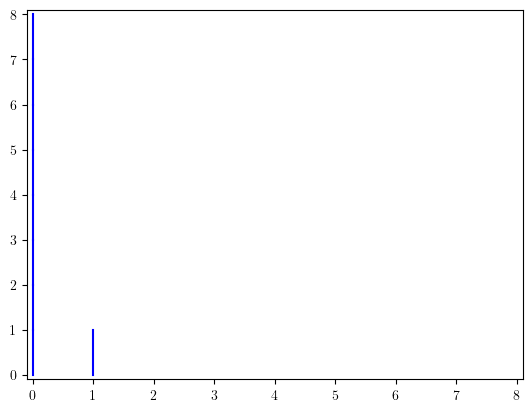

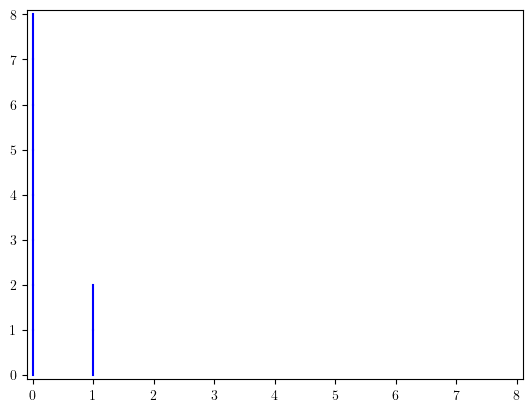

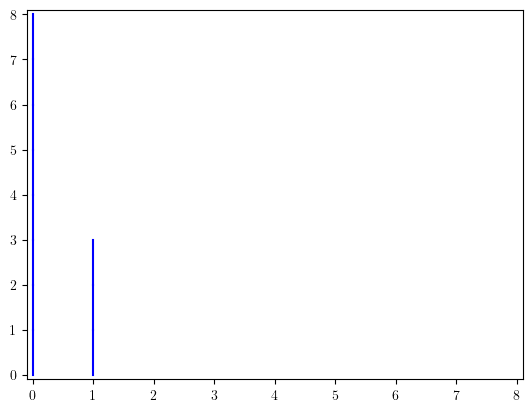

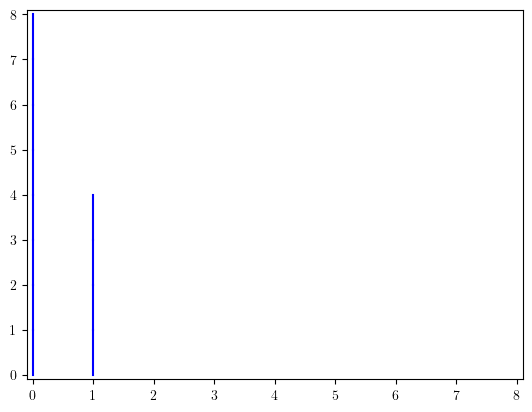

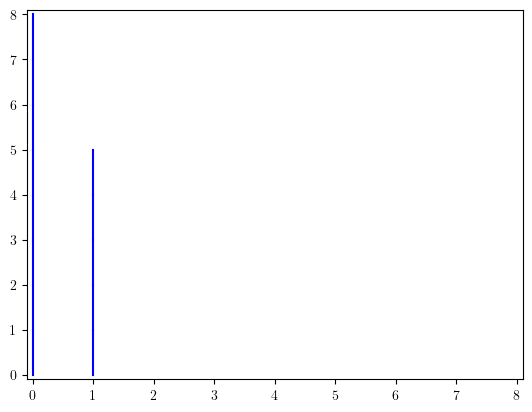

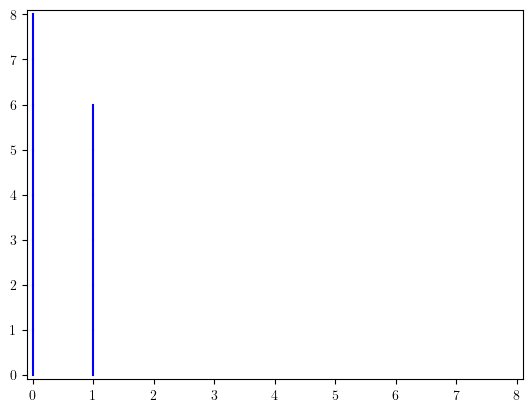

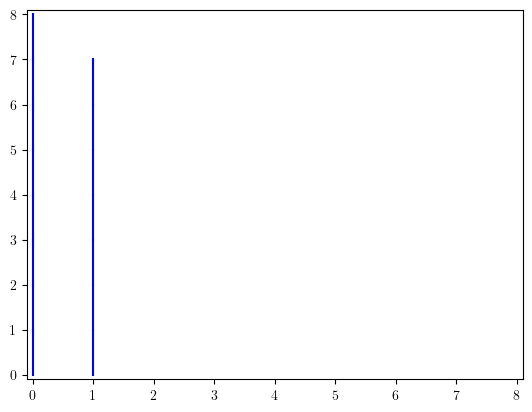

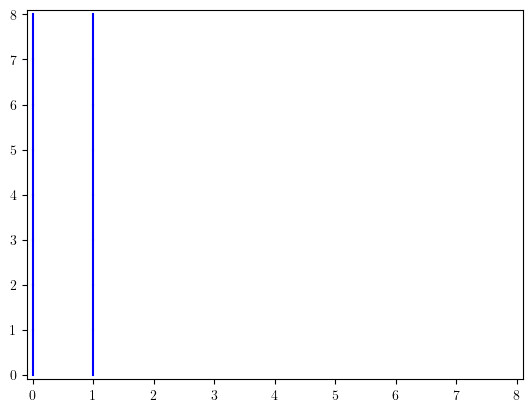

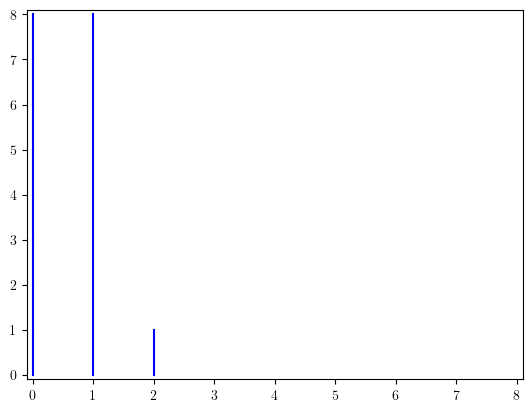

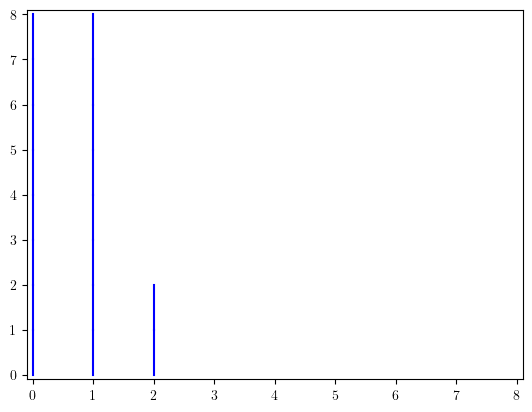

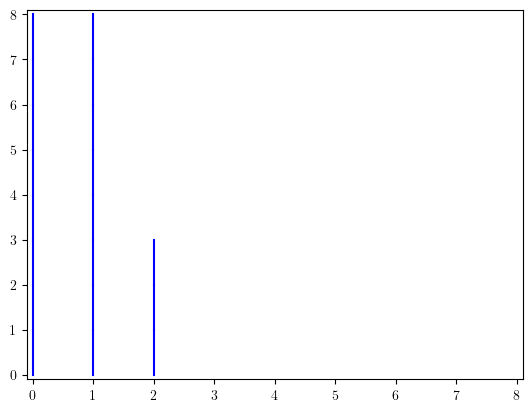

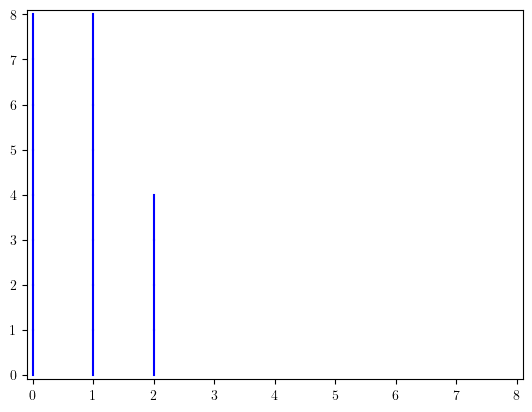

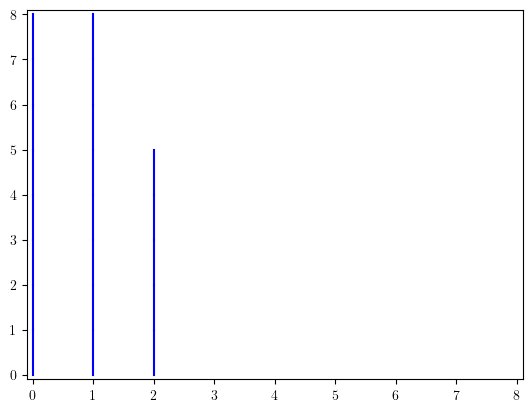

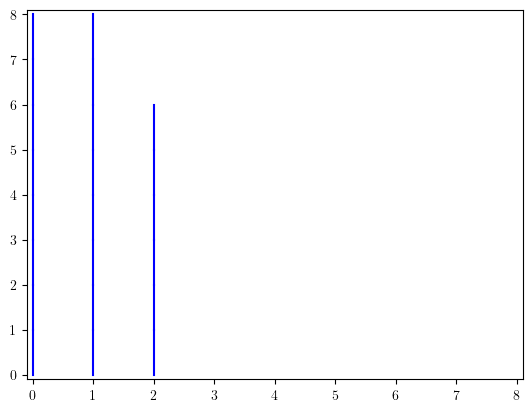

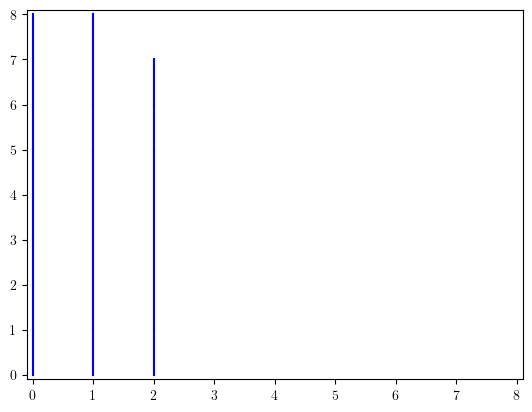

In [5]:
plot_states(lats.get_states())

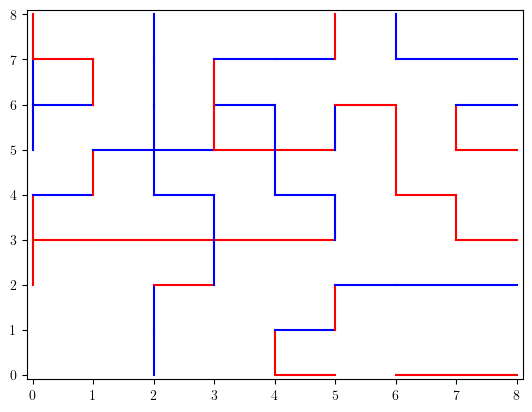

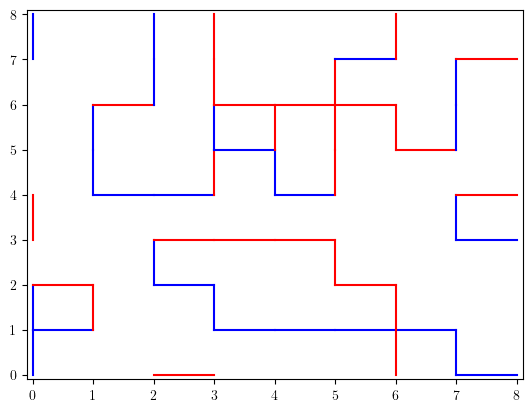

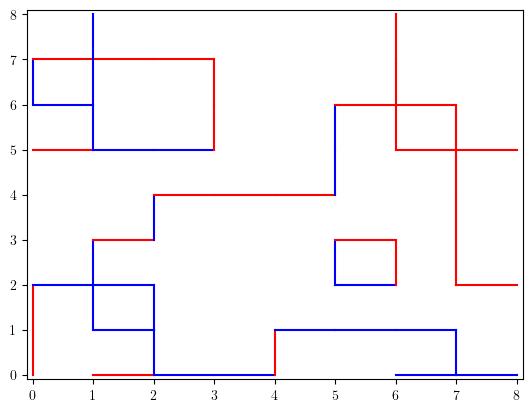

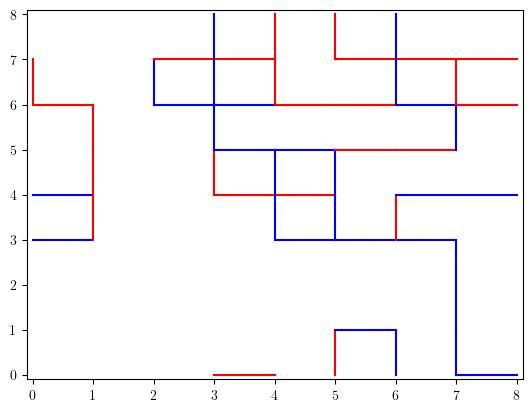

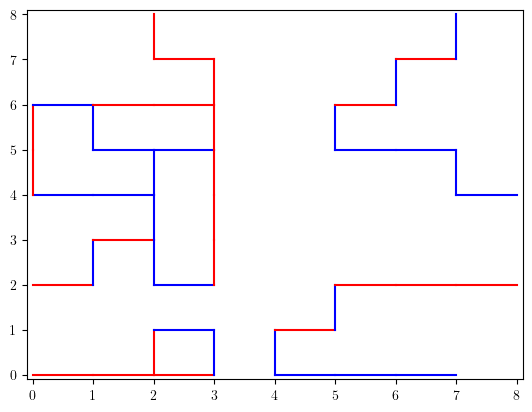

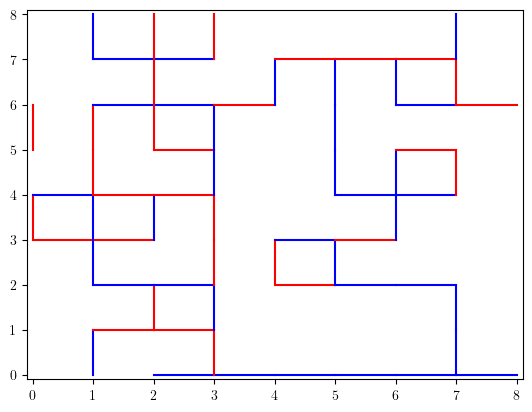

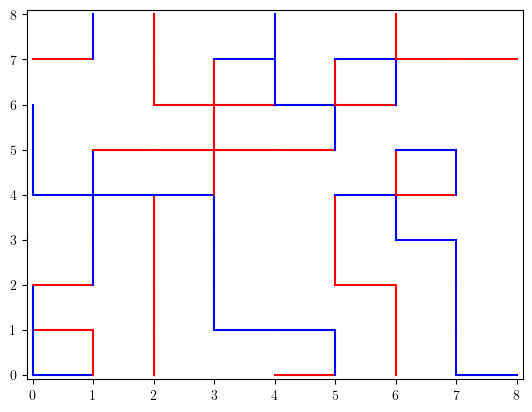

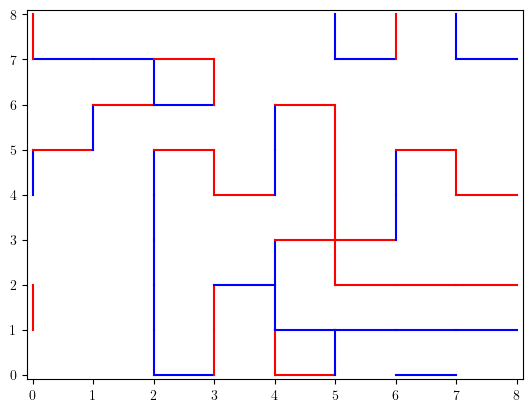

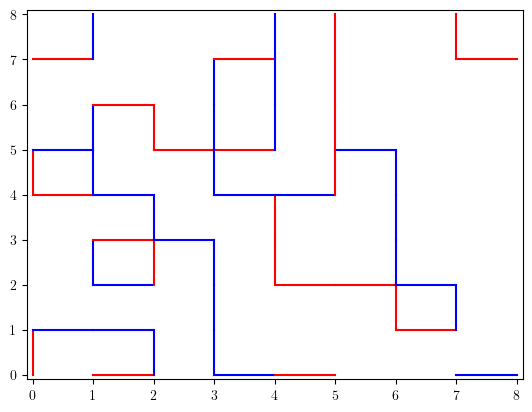

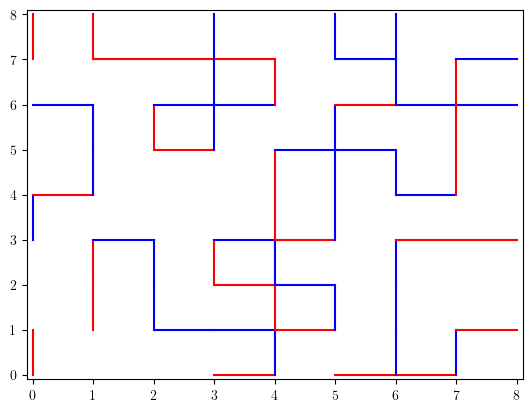

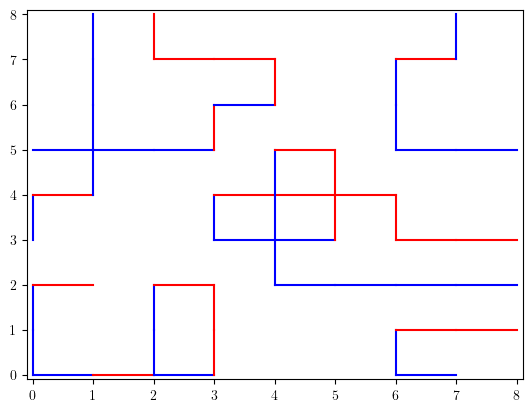

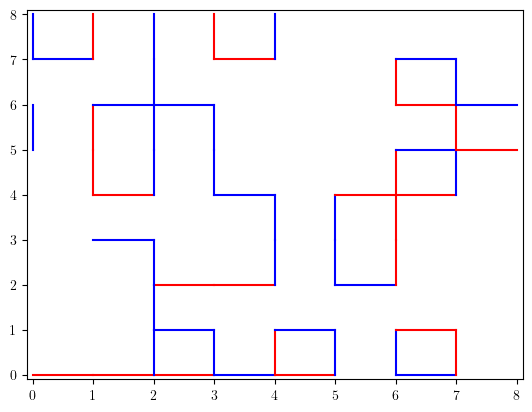

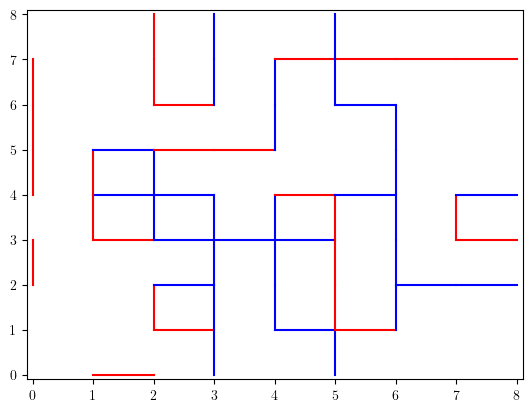

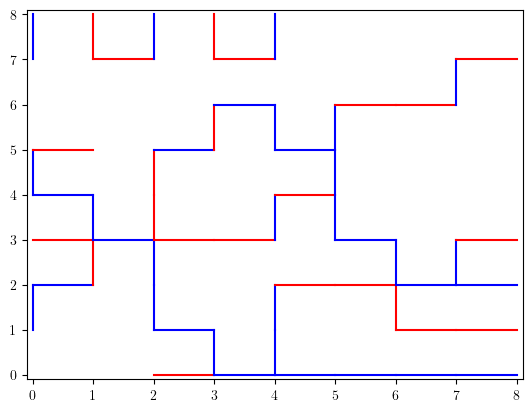

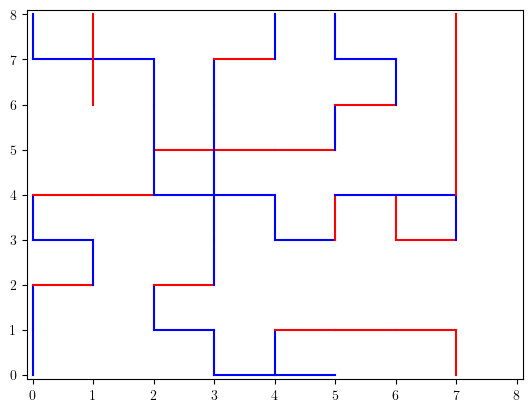

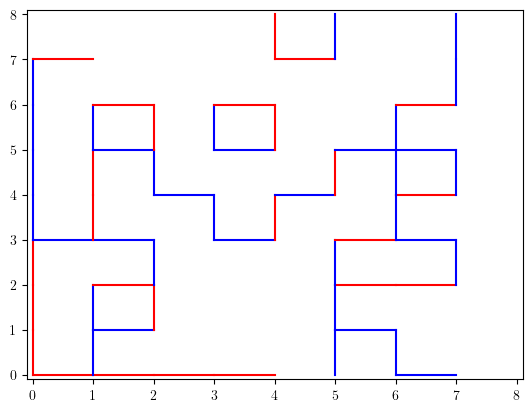

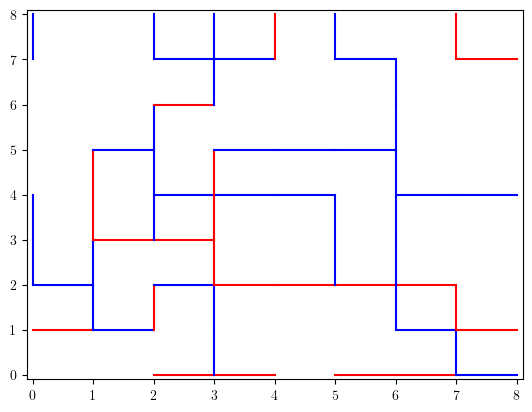

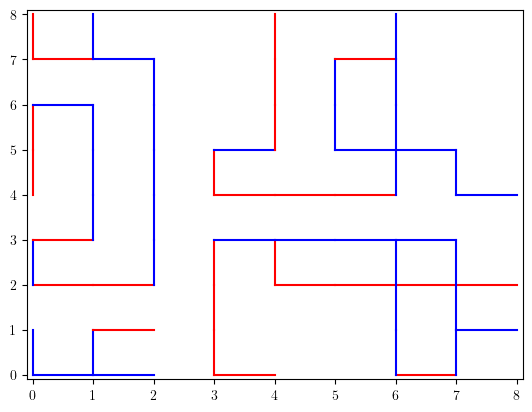

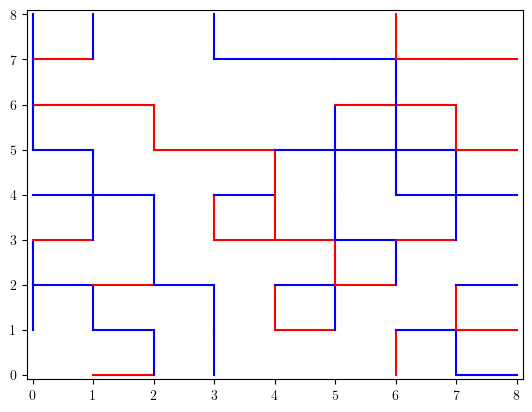

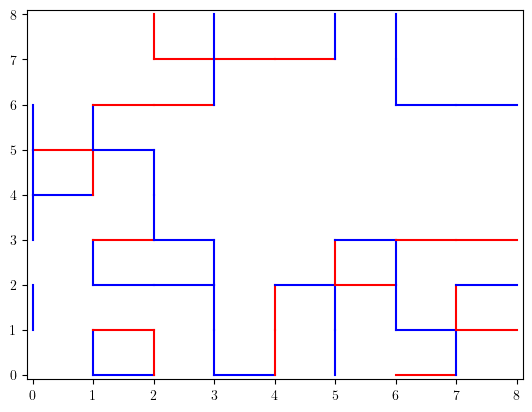

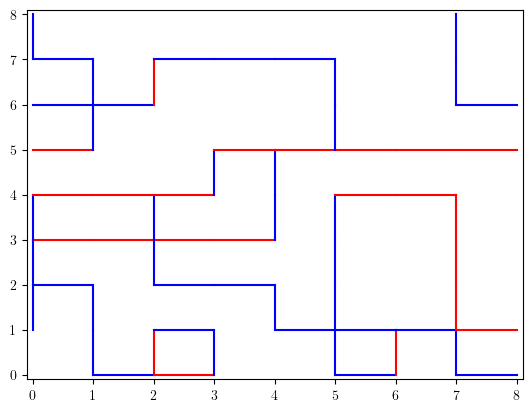

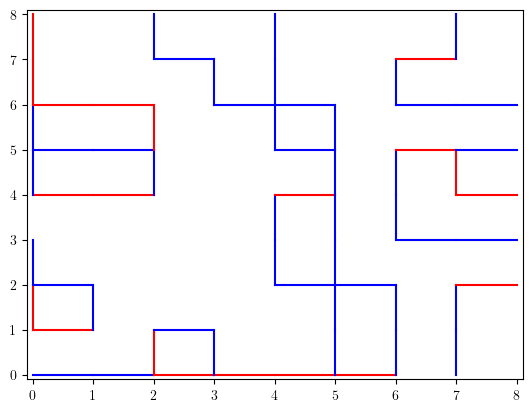

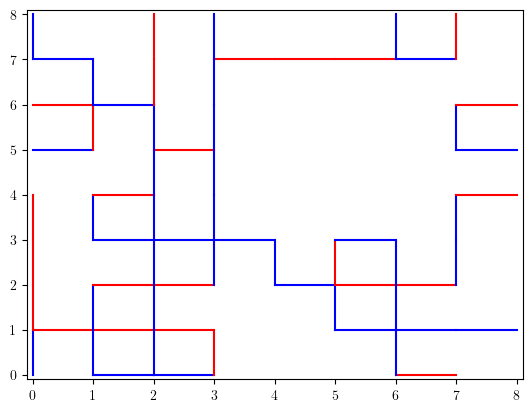

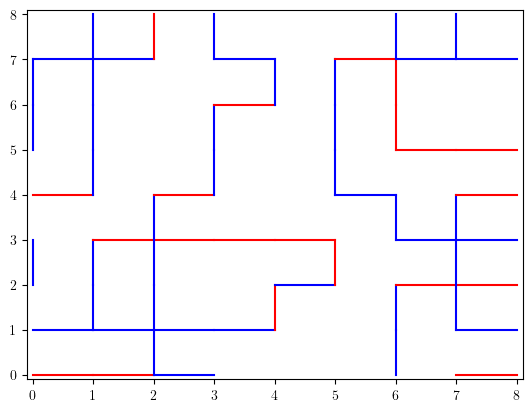

In [6]:
lats.update(8192)
plot_states(lats.get_states())

In [7]:
tps, fs = lats.simulate_and_get_transition_probs_and_free_energies(8192, 128)

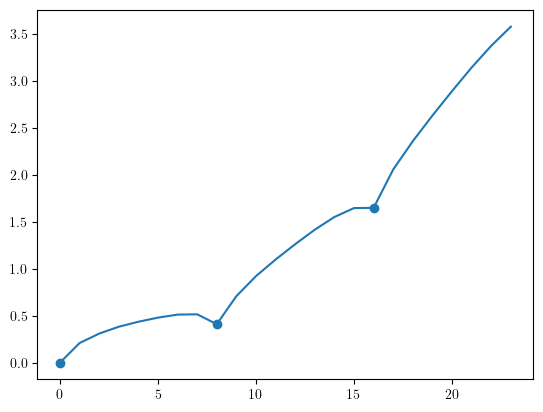

In [8]:
pyplot.plot(fs)

xs = numpy.arange(0,3)*l
pyplot.scatter(xs, fs[xs])

# Renormalization

In [9]:
def get_new_v1_v2_for_v1_v2(l, v1, v2, warmups=1024, updates_per_step=128, samples=1024):
    pots = numpy.array([0.0, v1, v2, 100.0])
    lats = py_xydual.PyRGLattice(l, pots, 2*l+1)

    lats.update(warmups)
    tps, fs = lats.simulate_and_get_transition_probs_and_free_energies(samples, updates_per_step)
    return fs[l], fs[2*l], fs

In [17]:
l = 4

filename_for_size = f"rg_l{l}"

data = []

if os.path.exists(filename_for_size):
    for ff in tqdm(os.listdir(filename_for_size)):
        arr = numpy.load(os.path.join(filename_for_size, ff))
        data.append((arr['v1'], arr['v2'], arr['new_v1'], arr['new_v2']))
else:
    os.makedirs(filename_for_size, exist_ok = True)

    v1s = numpy.linspace(0.1,2.0, 11)
    rs = numpy.linspace(1,11,11)

    v1s_and_rs = [(v1, r) for v1 in v1s for r in rs]

    for (v1, r) in tqdm(v1s_and_rs):
        v2 = r * v1
        new_v1, new_v2, fs = get_new_v1_v2_for_v1_v2(l, v1, v2)

        ff = os.path.join(filename_for_size, f"{hash((l,v1,v2,r))}.npz")
        numpy.savez(ff,
            v1=v1, v2=v2, r=r,
            new_v1=new_v1, new_v2=new_v2, fs=fs
        )

        data.append((v1, v2, new_v1, new_v2))

  0%|          | 0/121 [00:00<?, ?it/s]

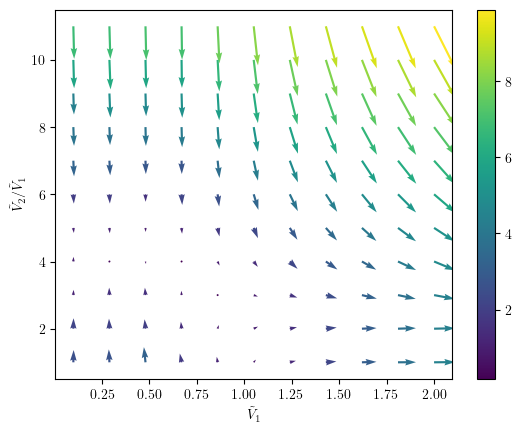

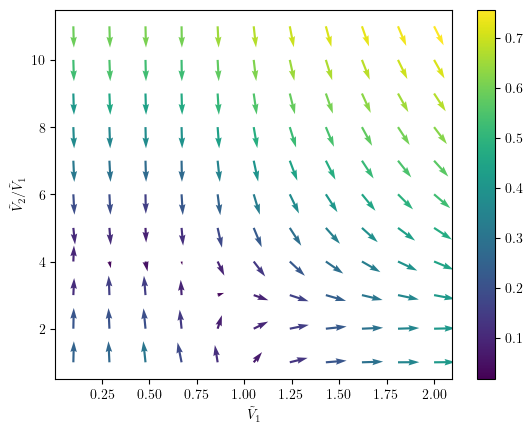

In [18]:
v1s, v2s, new_v1s, new_v2s = map(numpy.array, zip(*data))
rs = v2s/v1s
new_rs = new_v2s/new_v1s

dx = new_v1s - v1s
dy = new_rs - rs

pyplot.quiver(v1s, rs, dx, dy, numpy.sqrt(dx**2 + dy**2)) #, norm=matplotlib.colors.LogNorm())
pyplot.xlabel(r"$\tilde{V}_1$")
pyplot.ylabel(r"$\tilde{V}_2 / \tilde{V}_1$")
pyplot.colorbar()
pyplot.show()


mags = numpy.sqrt(dx**2 + dy**2)
ddx, ddy = dx/mags * numpy.tanh(mags), dy/mags * numpy.tanh(mags)

pyplot.quiver(v1s, rs, ddx, ddy, numpy.abs(numpy.tanh(0.1*numpy.sqrt(dx**2 + dy**2))))
pyplot.xlabel(r"$\tilde{V}_1$")
pyplot.ylabel(r"$\tilde{V}_2 / \tilde{V}_1$")
pyplot.colorbar()
pyplot.savefig(f"rg_flow_vn_l{l}.pdf")
pyplot.show()

In [28]:
l = 8

filename_for_size = f"rg_l{l}"

    
data = []

if os.path.exists(filename_for_size):
    for ff in tqdm(os.listdir(filename_for_size)):
        arr = numpy.load(os.path.join(filename_for_size, ff))
        data.append((arr['v1'], arr['v2'], arr['new_v1'], arr['new_v2']))
else:
    os.makedirs(filename_for_size, exist_ok = True)

    v1s = numpy.linspace(0.1,2.0, 11)
    rs = numpy.linspace(1,11,11)

    v1s_and_rs = [(v1, r) for v1 in v1s for r in rs]

    for (v1, r) in tqdm(v1s_and_rs):
        v2 = r * v1
        new_v1, new_v2, fs = get_new_v1_v2_for_v1_v2(l, v1, v2)

        ff = os.path.join(filename_for_size, f"{hash((l,v1,v2,r))}.npz")
        numpy.savez(ff,
            v1=v1, v2=v2, r=r,
            new_v1=new_v1, new_v2=new_v2, fs=fs
        )

        data.append((v1, v2, new_v1, new_v2))

  0%|          | 0/121 [00:00<?, ?it/s]

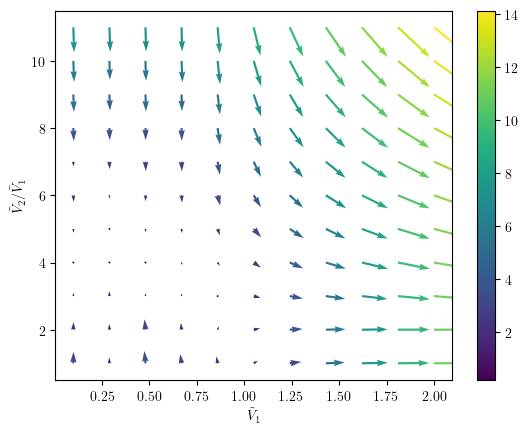

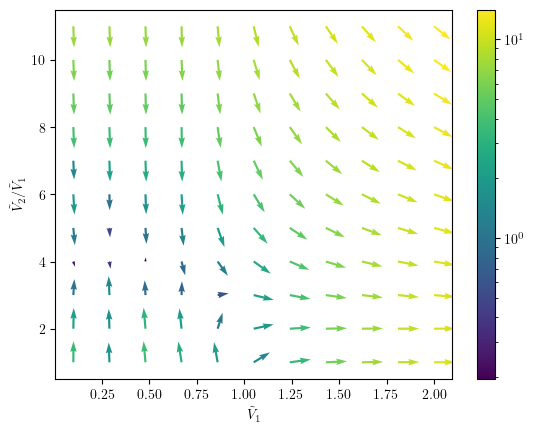

In [29]:
v1s, v2s, new_v1s, new_v2s = map(numpy.array, zip(*data))
rs = v2s/v1s
new_rs = new_v2s/new_v1s

dx = new_v1s - v1s
dy = new_rs - rs

pyplot.quiver(v1s, rs, dx, dy, numpy.sqrt(dx**2 + dy**2)) #, norm=matplotlib.colors.LogNorm())
pyplot.xlabel(r"$\tilde{V}_1$")
pyplot.ylabel(r"$\tilde{V}_2 / \tilde{V}_1$")
pyplot.colorbar()
pyplot.show()


mags = numpy.sqrt(dx**2 + dy**2)
ddx, ddy = dx/mags * numpy.tanh(mags), dy/mags * numpy.tanh(mags)

pyplot.quiver(v1s, rs, ddx, ddy, numpy.sqrt(dx**2 + dy**2), 
              norm=matplotlib.colors.LogNorm(), cmap=matplotlib.cm.viridis)
pyplot.xlabel(r"$\tilde{V}_1$")
pyplot.ylabel(r"$\tilde{V}_2 / \tilde{V}_1$")
pyplot.colorbar()
pyplot.savefig(f"rg_flow_vn_l{l}.pdf")
pyplot.show()

In [21]:
l = 16

filename_for_size = f"rg_l{l}"

    
data = []

if os.path.exists(filename_for_size):
    for ff in tqdm(os.listdir(filename_for_size)):
        arr = numpy.load(os.path.join(filename_for_size, ff))
        data.append((arr['v1'], arr['v2'], arr['new_v1'], arr['new_v2']))
else:
    os.makedirs(filename_for_size, exist_ok = True)

    v1s = numpy.linspace(0.1,2.0, 11)
    rs = numpy.linspace(1,11,11)

    v1s_and_rs = [(v1, r) for v1 in v1s for r in rs]

    for (v1, r) in tqdm(v1s_and_rs):
        v2 = r * v1
        new_v1, new_v2, fs = get_new_v1_v2_for_v1_v2(l, v1, v2)

        ff = os.path.join(filename_for_size, f"{hash((l,v1,v2,r))}.npz")
        numpy.savez(ff,
            v1=v1, v2=v2, r=r,
            new_v1=new_v1, new_v2=new_v2, fs=fs
        )

        data.append((v1, v2, new_v1, new_v2))

  0%|          | 0/121 [00:00<?, ?it/s]

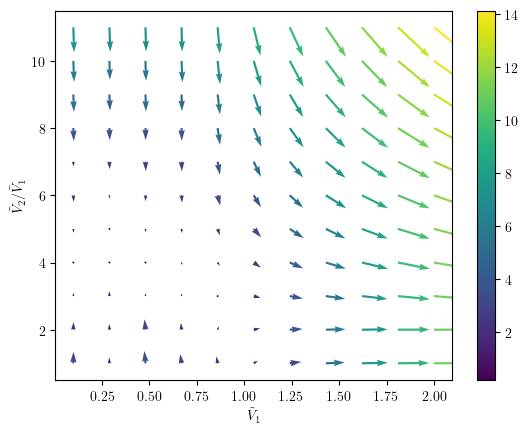

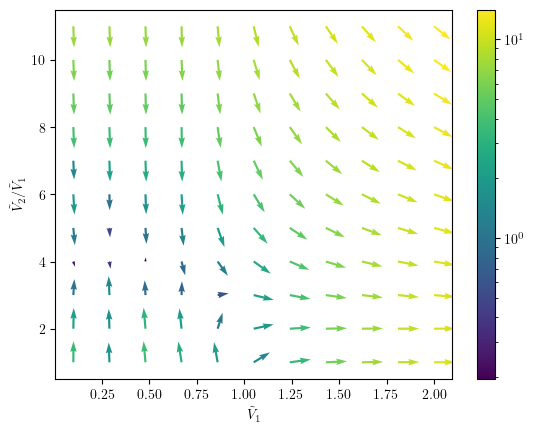

In [30]:
v1s, v2s, new_v1s, new_v2s = map(numpy.array, zip(*data))
rs = v2s/v1s
new_rs = new_v2s/new_v1s

dx = new_v1s - v1s
dy = new_rs - rs

pyplot.quiver(v1s, rs, dx, dy, numpy.sqrt(dx**2 + dy**2)) #, norm=matplotlib.colors.LogNorm())
pyplot.xlabel(r"$\tilde{V}_1$")
pyplot.ylabel(r"$\tilde{V}_2 / \tilde{V}_1$")
pyplot.colorbar()
pyplot.show()


mags = numpy.sqrt(dx**2 + dy**2)
ddx, ddy = dx/mags * numpy.tanh(mags), dy/mags * numpy.tanh(mags)

pyplot.quiver(v1s, rs, ddx, ddy, numpy.sqrt(dx**2 + dy**2), 
              norm=matplotlib.colors.LogNorm(), cmap=matplotlib.cm.viridis)
pyplot.xlabel(r"$\tilde{V}_1$")
pyplot.ylabel(r"$\tilde{V}_2 / \tilde{V}_1$")
pyplot.colorbar()
pyplot.savefig(f"rg_flow_vn_l{l}.pdf")
pyplot.show()

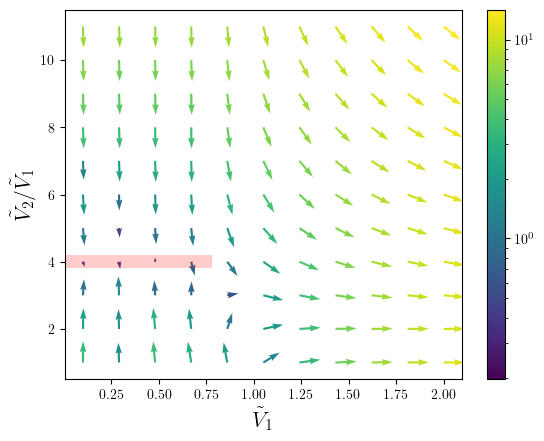

In [31]:
# CHANGE OF COLORS
fig, ax = pyplot.subplots()


img = ax.quiver(v1s, rs, ddx, ddy, numpy.sqrt(dx**2 + dy**2), 
                norm=matplotlib.colors.LogNorm(), cmap=matplotlib.cm.viridis)
xlim, ylim = ax.set_xlim(), ax.set_ylim()

poly = Polygon([
    [0,3.8],
    [0.777,3.8],
    [0.777,4.2],
    [0,4.2],
],fill=True,closed=True,facecolor='red', alpha=0.2)
ax.add_patch(poly)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel(r"$\tilde{V}_1$", fontsize=16)
ax.set_ylabel(r"$\tilde{V}_2 / \tilde{V}_1$", fontsize=16)
fig.colorbar(img)
pyplot.savefig(f"kt_rg_flow_vn_l{l}.pdf",bbox_inches='tight')
pyplot.show()